In [6]:
import ibmJupyterNotebookStyles
ibmJupyterNotebookStyles.apply_ibm_styles()

In [7]:
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import Aer
from qiskit_algorithms.optimizers import COBYLA,SPSA,ADAM,L_BFGS_B,GradientDescent
from qiskit_algorithms.minimum_eigensolvers import NumPyMinimumEigensolver, VQE
from qiskit.primitives import Estimator
from qiskit.circuit.library import TwoLocal

from qiskit_algorithms.utils import algorithm_globals
from matplotlib import pyplot as plt

Exact solution (classical): -1.8572750302023795
COBYLA 141 -1.8369679893480844
COBYLA 192 -1.836967990150948
COBYLA 142 -1.836967989739782
COBYLA 152 -1.8369679894514193
COBYLA 167 -1.8369679870546571
SPSA 200 -1.8369394289435843
SPSA 200 -1.831175168928193
SPSA 200 -1.8368864898335755
SPSA 200 -1.8369196333135378
SPSA 200 -1.8367567194171297
GD 5500 -1.7696208471150845
GD 5500 -1.836425530102485
GD 5500 -1.8271349793997749
GD 5500 -1.8204319551423942
GD 5500 -1.7778446686608425
L_BFGS_B 143 -1.8369679910952652
L_BFGS_B 143 -1.8369679911758194
L_BFGS_B 110 -1.8369679911807266
L_BFGS_B 143 -1.8369679912029049
L_BFGS_B 121 -1.8369679912014905
ADAM 500 -1.6123780983190767
ADAM 500 -1.6010517348507307
ADAM 500 -1.527789829170236
ADAM 500 -1.833402509012863
ADAM 500 -1.8222123813062119


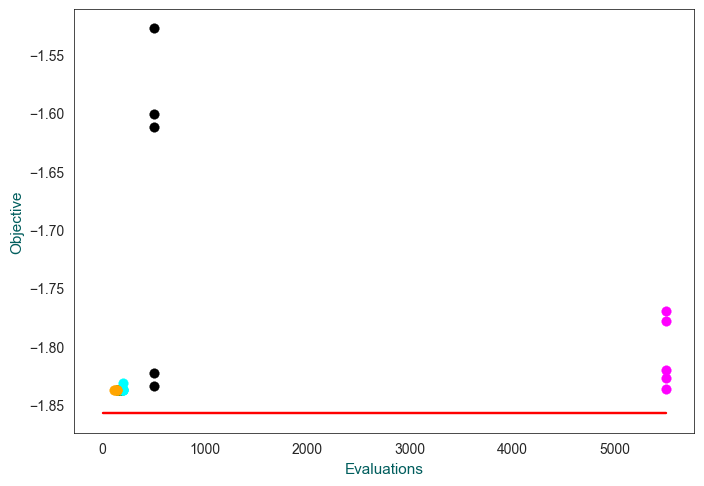

In [8]:
estimator = Estimator()

H2_op = SparsePauliOp(['II','IZ','ZI','ZZ','XX'],[-1.052373245772859 ,0.39793742484318045,-0.39793742484318045,-0.01128010425623538,0.18093119978423156])

npme = NumPyMinimumEigensolver()
np_result = npme.compute_minimum_eigenvalue(H2_op.to_operator())
algorithm_globals.random_seed =50
print("Exact solution (classical):",np_result.eigenvalue)

p = 2  # Toy example: 2 layers with 2 parameters in each layer: 4 variables

#
#opt = COBYLA()
#opt = SPSA()
#opt = ADAM()
opt = L_BFGS_B()
#opt = GradientDescent()

mxi=500
backend = Aer.get_backend('statevector_simulator')
fe=[]
fv=[]
mxfe=0
for i in range(5):
    if i==0:
        opt = COBYLA(maxiter=mxi)
        out = 'COBYLA'
        col='green'
    elif i==1:
        opt = SPSA()
        out = 'SPSA'
        col='cyan'
    elif i==2:
        opt = GradientDescent(maxiter=mxi)
        out = 'GD'
        col='magenta'
    elif i==3:
        opt =  L_BFGS_B(maxiter=mxi)
        out = 'L_BFGS_B'
        col='orange'
    elif i==4:
        opt = ADAM(maxiter=mxi)
        out = 'ADAM'
        col='black'
    for j in range(5):
        
        vqe = VQE(
            estimator, TwoLocal(H2_op.num_qubits,'rx','rz',reps=p), optimizer=opt)
        result = vqe.compute_minimum_eigenvalue(operator=H2_op)

        fe=result.cost_function_evals
        fv=result.eigenvalue.real
        if (fe > mxfe):
            mxfe=fe
        if (j==0):
            plt.scatter(fe,fv,label=out,color=col)
        else:
            plt.scatter(fe,fv,color=col)
        
        print(out,fe,fv)
plt.xlabel('Evaluations')
plt.ylabel('Objective')
plt.plot([0,mxfe], [np_result.eigenvalue,np_result.eigenvalue], color = 'r', )


<span style="font-size:10pt; font-weight:bold;"> &copy; Copyright IBM Corp. 2023 <br/>This content is categorized as an “existing” IBM asset as part of the IBM Quantum Accelerator contract. </span>